In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key

In [2]:
lats = np.random.uniform(-90,90,1500)
longs = np.random.uniform(-180,180,1500)
lat_lngs = zip(lats,longs)

In [3]:
coordinates = list(lat_lngs)

In [4]:
cities = []
for coordinate in coordinates:
    # find nearest city
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # if city is unique, add to list of cities
    if city not in cities:
        cities.append(city)
print(len(cities))

600


In [5]:
import requests
from datetime import datetime

In [6]:
# Define base url
url = 'http://api.openweathermap.org/data/2.5/weather?q='
# Create empty list to hold the weather data
city_data = []

# Print the beginning of logging
print("Beginning Data Retreival         ")
print("---------------------------------")

# Create counters for cities and log sets
record_count = 1
set_count = 1
cities_found = 0
cities_not_found = 0

# Loop through all the cities in our list
for i in range(0,len(cities)):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city = cities[i]
    city_url = url + city.replace(" ","+") + '&units=Imperial&APPID=' + weather_api_key

    # Log the URL, record, and set numbers, and the city
#     print(f'Processing Record {record_count} of Set {set_count}: {cities[i]}')

    record_count += 1

    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_long = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({'City': city.title(),
                            'Lat': city_lat,
                            'Long': city_long,
                            'Max Temp': city_max_temp,
                            'Humidity': city_humidity,
                            'Cloudiness': city_clouds,
                            'Wind Speed': city_wind,
                            'Country': city_country,
                            'Date': city_date})
        cities_found += 1
    except:
#         print('City not found. Skipping...')
        cities_not_found += 1
        continue
print(cities_found, cities_not_found)
# city = cities[i]
# city_url = url + '&q=' + city.replace(" ","+")
# r = requests.get(city_url)
# print(r)


Beginning Data Retreival         
---------------------------------
554 46


In [34]:
len(city_data)

554

In [35]:
city_data[1]

{'City': 'Dikson',
 'Lat': 73.5069,
 'Long': 80.5464,
 'Max Temp': -32.22,
 'Humidity': 79,
 'Cloudiness': 65,
 'Wind Speed': 4.54,
 'Country': 'RU',
 'Date': '2021-01-28 20:34:53'}

In [36]:
city_weather_df = pd.DataFrame(city_data)

In [37]:
city_weather_df.head(10)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,84.20,70,20,14.97,CK,2021-01-28 20:34:53
1,Dikson,73.5069,80.5464,-32.22,79,65,4.54,RU,2021-01-28 20:34:53
2,Lavrentiya,65.5833,-171.0000,-8.97,84,100,12.82,RU,2021-01-28 20:34:53
3,Qaanaaq,77.4840,-69.3632,-12.15,67,0,9.17,GL,2021-01-28 20:34:53
4,Arraial Do Cabo,-22.9661,-42.0278,87.80,57,0,20.71,BR,2021-01-28 20:33:46
5,Bluff,-46.6000,168.3333,48.00,80,99,8.01,NZ,2021-01-28 20:34:53
6,Jamestown,42.0970,-79.2353,18.00,79,90,12.66,US,2021-01-28 20:34:49
7,Kencong,-8.2833,113.3667,75.81,87,100,6.73,ID,2021-01-28 20:34:54
8,Liku,-0.7275,119.8922,74.68,89,100,3.94,ID,2021-01-28 20:34:54
9,Atuona,-9.8000,-139.0333,78.31,76,14,18.72,PF,2021-01-28 20:34:54


In [38]:
column_order = ['City','Country','Date','Lat','Long','Max Temp','Humidity','Cloudiness','Wind Speed']
city_weather_df = city_weather_df[column_order]
city_weather_df.tail(10)

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
544,Tsuruga,JP,2021-01-28 20:36:32,35.6455,136.0558,35.01,58,100,8.01
545,Algiers,DZ,2021-01-28 20:31:47,36.7525,3.0420,55.40,88,0,3.44
546,Zlobin,HR,2021-01-28 20:36:32,45.2924,14.6541,41.00,93,75,5.75
547,Nago,JP,2021-01-28 20:36:32,26.5881,127.9761,55.40,58,75,18.41
548,Morro Bay,US,2021-01-28 20:33:19,35.3658,-120.8499,52.00,97,100,14.14
549,Caravelas,BR,2021-01-28 20:36:32,-17.7125,-39.2481,79.07,73,73,7.07
550,Mercedes,AR,2021-01-28 20:33:20,-34.6515,-59.4307,88.00,43,88,8.12
551,Seydi,TM,2021-01-28 20:36:33,39.4816,62.9137,40.95,63,0,13.27
552,Abeche,TD,2021-01-28 20:36:33,13.8292,20.8324,73.40,17,61,13.38
553,Zhengjiatun,CN,2021-01-28 20:36:33,43.5064,123.5064,-16.11,83,0,6.64


In [39]:
city_weather_df.loc[city_weather_df['Country'] == 'US'].sort_values(by='City')

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
22,Albany,US,2021-01-28 20:30:01,42.6001,-73.9662,23.00,48,29,1.99
32,Barrow,US,2021-01-28 20:34:59,71.2906,-156.7887,-11.20,77,90,9.22
526,Beckley,US,2021-01-28 20:36:29,37.7782,-81.1882,27.00,68,90,13.80
196,Bethel,US,2021-01-28 20:35:29,41.3712,-73.4140,28.40,43,1,18.41
324,Broome,US,2021-01-28 20:31:04,42.2506,-75.8330,19.00,57,90,17.27
278,Bud,US,2021-01-28 20:35:44,39.4470,-86.1758,32.00,70,0,6.96
460,Charleston,US,2021-01-28 20:35:33,32.7766,-79.9309,53.60,43,1,14.97
385,Cheney,US,2021-01-28 20:36:03,47.4874,-117.5758,39.99,75,75,5.75
465,Destin,US,2021-01-28 20:31:29,30.3935,-86.4958,57.99,41,1,12.66
434,Douglas,US,2021-01-28 20:33:15,41.3000,-96.1670,28.00,86,90,17.27


In [40]:
city_weather_df.head()

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2021-01-28 20:34:53,-21.2078,-159.7750,84.20,70,20,14.97
1,Dikson,RU,2021-01-28 20:34:53,73.5069,80.5464,-32.22,79,65,4.54
2,Lavrentiya,RU,2021-01-28 20:34:53,65.5833,-171.0000,-8.97,84,100,12.82
3,Qaanaaq,GL,2021-01-28 20:34:53,77.4840,-69.3632,-12.15,67,0,9.17
4,Arraial Do Cabo,BR,2021-01-28 20:33:46,-22.9661,-42.0278,87.80,57,0,20.71


In [41]:
output_data_file = 'weather_data/cities.csv'

In [42]:
city_weather_df.to_csv(output_data_file)

In [43]:
import time
today = time.strftime('%x')
today

'01/28/21'

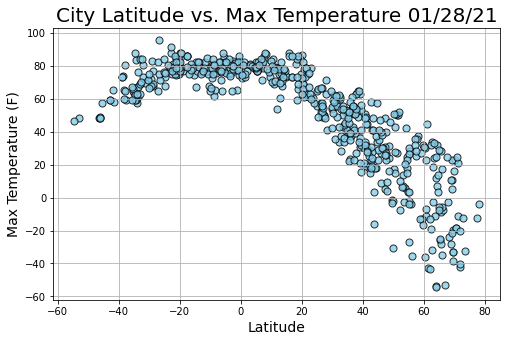

In [44]:
city_weather_df.plot.scatter(x='Lat',y='Max Temp',
                            figsize=(8,5),color='skyblue',
                            edgecolor='black',s=50,
                            alpha=0.8, linewidths=1,
                            marker='o')
plt.ylabel('Max Temperature (F)',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}", fontsize=20)
plt.grid()
plt.savefig('weather_data/latVmaxtemp.png',facecolor='white')
plt.show()

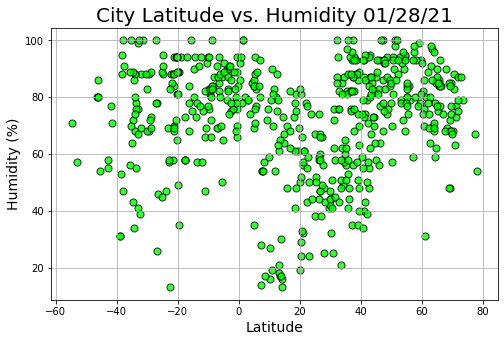

In [45]:
city_weather_df.plot.scatter('Lat','Humidity',
                            figsize=(8,5),color='lime',
                            edgecolor='black',s=50,
                            alpha = 0.8, linewidths=1,
                            marker = 'o')
plt.ylabel('Humidity (%)',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}", fontsize=20)
plt.grid()
plt.savefig('weather_data/latVhumidity.png', facecolor='white')
plt.show()

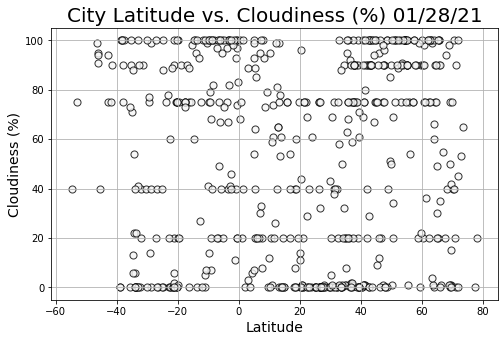

In [46]:
city_weather_df.plot.scatter('Lat','Cloudiness',
                            figsize=(8,5),color='whitesmoke',
                            edgecolor='black',s=50,
                            alpha = 0.8, linewidths=1,
                            marker = 'o')
plt.ylabel('Cloudiness (%)',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
plt.title(f"City Latitude vs. Cloudiness (%) {time.strftime('%x')}", fontsize=20)
plt.grid()
plt.savefig('weather_data/latVcloudiness.png', facecolor='white')
plt.show()

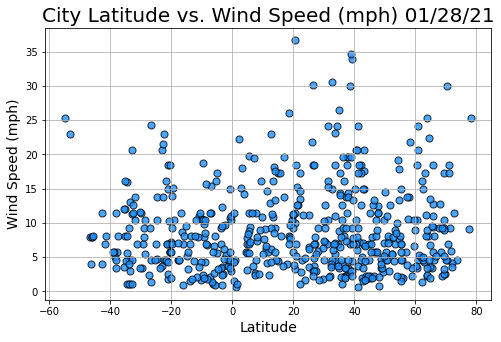

In [47]:
city_weather_df.plot.scatter('Lat','Wind Speed',
                            figsize=(8,5),color='dodgerblue',
                            edgecolor='black',s=50,
                            alpha = 0.8, linewidths=1,
                            marker = 'o')
plt.ylabel('Wind Speed (mph)',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
plt.title(f"City Latitude vs. Wind Speed (mph) {time.strftime('%x')}", fontsize=20)
plt.grid()
plt.savefig('weather_data/latVwind.png', facecolor='white')
plt.show()

In [48]:
from scipy.stats import linregress

In [49]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Find components of linear regression equation
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)

    # Write linear equation as string
    lin_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    # Calculate regression values for points in x_values
    regress_values = [x * slope + intercept for x in x_values]

    # Plots x_values & y_values as scatter plot and linear regression as line
    plt.figure(figsize = (8,5))
    plt.scatter(x_values, y_values, alpha=0.8,edgecolor='black',linewidths=1,color='skyblue')
    plt.plot(x_values, regress_values, 'r')
    plt.annotate(f"{lin_eq}\nr-value: {r_value:.4f}\np-value: {p_value:.4f}", text_coordinates, fontsize=10, color='red',backgroundcolor='white')
    plt.xlabel('Latitude',fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.title(title, fontsize=20)
    plt.show()

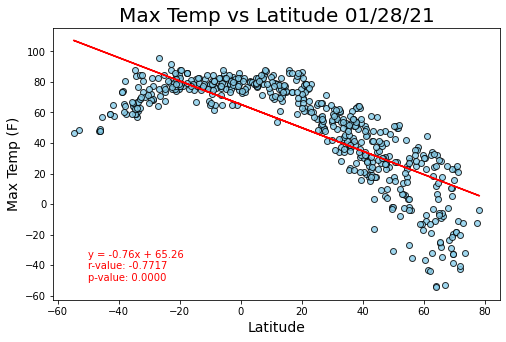

In [50]:
plot_linear_regression(city_weather_df['Lat'], city_weather_df['Max Temp'], f"Max Temp vs Latitude {time.strftime('%x')}", 'Max Temp (F)',(-50,-50))

In [51]:
(slope, intercept, r_value, p_value, stderr) = linregress(city_weather_df['Lat'], city_weather_df['Wind Speed'])
p_value

0.1900940630324843

In [52]:
northern_df = city_weather_df.loc[city_weather_df['Lat'] >= 0]
southern_df = city_weather_df.loc[city_weather_df['Lat'] < 0]
northern_df.head()

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
1,Dikson,RU,2021-01-28 20:34:53,73.5069,80.5464,-32.22,79,65,4.54
2,Lavrentiya,RU,2021-01-28 20:34:53,65.5833,-171.0000,-8.97,84,100,12.82
3,Qaanaaq,GL,2021-01-28 20:34:53,77.4840,-69.3632,-12.15,67,0,9.17
6,Jamestown,US,2021-01-28 20:34:49,42.0970,-79.2353,18.00,79,90,12.66
11,Mawlaik,MM,2021-01-28 20:34:55,23.6333,94.4167,60.12,74,0,1.72


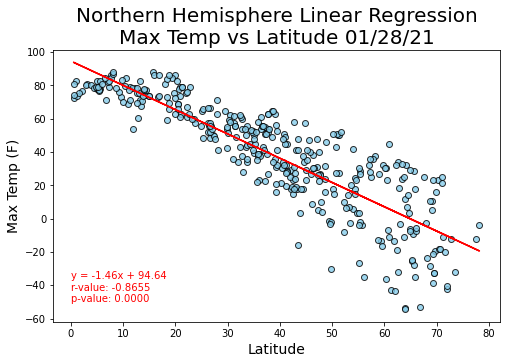

In [53]:
plot_linear_regression(northern_df['Lat'], northern_df['Max Temp'], 
                        f"Northern Hemisphere Linear Regression\nMax Temp vs Latitude {time.strftime('%x')}", 
                        'Max Temp (F)',(0,-50))

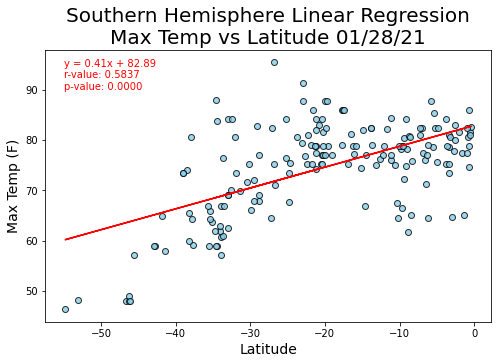

In [54]:
plot_linear_regression(southern_df['Lat'], southern_df['Max Temp'], 
                        f"Southern Hemisphere Linear Regression\nMax Temp vs Latitude {time.strftime('%x')}", 
                        'Max Temp (F)',(-55,90))

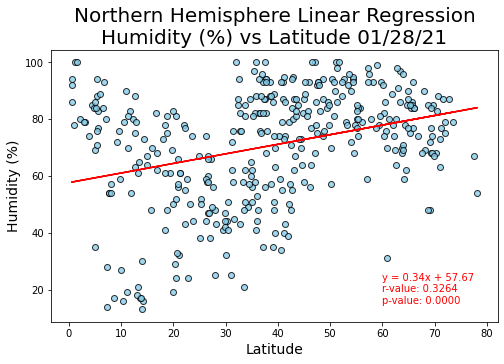

In [56]:
plot_linear_regression(northern_df['Lat'], northern_df['Humidity'], 
                        f"Northern Hemisphere Linear Regression\nHumidity (%) vs Latitude {time.strftime('%x')}", 
                        'Humidity (%)',(60,15))

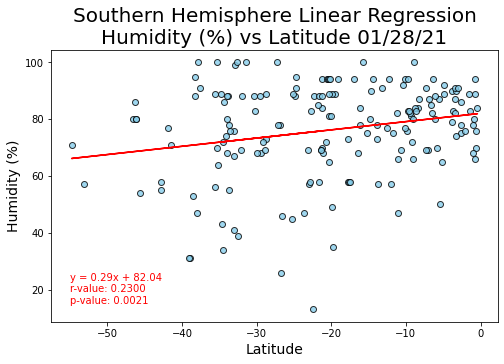

In [57]:
plot_linear_regression(southern_df['Lat'], southern_df['Humidity'], 
                        f"Southern Hemisphere Linear Regression\nHumidity (%) vs Latitude {time.strftime('%x')}", 
                        'Humidity (%)',(-55,15))

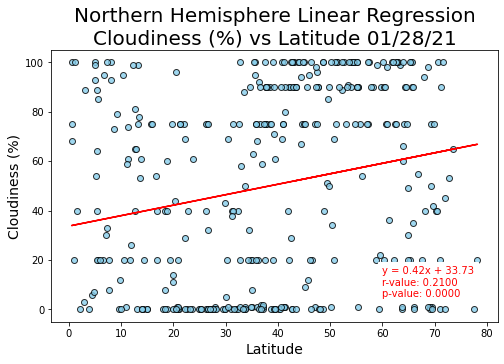

In [58]:
plot_linear_regression(northern_df['Lat'], northern_df['Cloudiness'], 
                        f"Northern Hemisphere Linear Regression\nCloudiness (%) vs Latitude {time.strftime('%x')}", 
                        'Cloudiness (%)',(60,5))

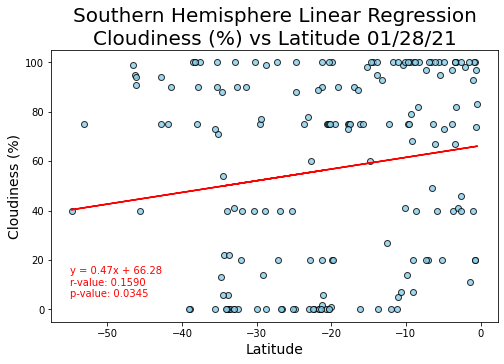

In [60]:
plot_linear_regression(southern_df['Lat'], southern_df['Cloudiness'], 
                        f"Southern Hemisphere Linear Regression\nCloudiness (%) vs Latitude {time.strftime('%x')}", 
                        'Cloudiness (%)',(-55,5))

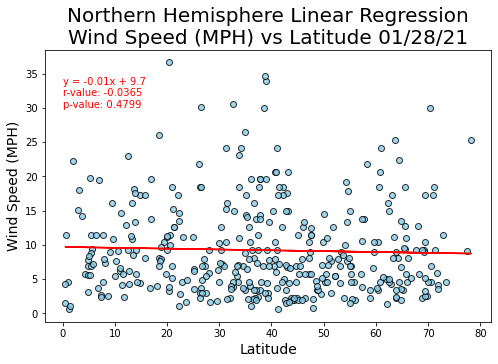

In [62]:
plot_linear_regression(northern_df['Lat'], northern_df['Wind Speed'], 
                        f"Northern Hemisphere Linear Regression\nWind Speed (MPH) vs Latitude {time.strftime('%x')}", 
                        'Wind Speed (MPH)',(0,30))

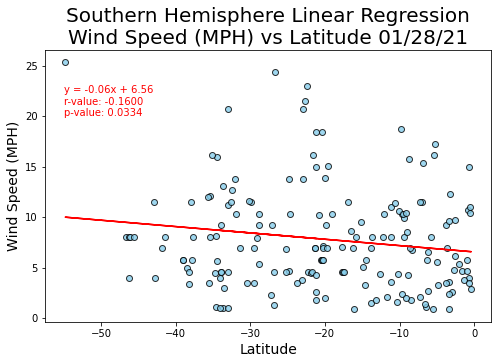

In [64]:
plot_linear_regression(southern_df['Lat'], southern_df['Wind Speed'], 
                        f"Southern Hemisphere Linear Regression\nWind Speed (MPH) vs Latitude {time.strftime('%x')}", 
                        'Wind Speed (MPH)',(-55,20))